# Ê†∑‰æãÊï∞ÊçÆËØçË¢ãÊ®°Âûã

### Ëã±ÊñáÔºàtwitter)

In [53]:
import re
import nltk
import jieba
import string
import pandas as pd
from nltk import pos_tag
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# ÂØºÂÖ•Êï∞ÊçÆ
text_twi = pd.read_csv(r'D:\Á†î‰∏Ä‰∏ã ‰Ωú‰∏ö\ÊñáÊú¨ÂàÜÊûê\ËØçË¢ãÊ®°Âûã\text_analysis_twitter.csv')
text_twi = text_twi.drop(['Unnamed: 0'], axis=1)

In [4]:
text_twi.head()

id   screen_name                       time  \
0  881004944714866688  KamalaHarris  2017-07-01T00:22:01-04:00   
1  881002538341986304    MarcVeasey  2017-07-01T00:12:28-04:00   
2  881001393284419584  RepPaulTonko  2017-07-01T00:07:55-04:00   
3  881000301007958016     clairecmc  2017-07-01T00:03:34-04:00   
4  881015727540637696       tedcruz  2017-07-01T01:04:52-04:00   

                                                link  \
0  https://www.twitter.com/KamalaHarris/statuses/...   
1  https://www.twitter.com/kylegriffin1/statuses/...   
2  https://www.twitter.com/RepPaulTonko/statuses/...   
3  https://www.twitter.com/clairecmc/statuses/881...   
4  https://www.twitter.com/larry_kudlow/statuses/...   

                                                text               source  
0  Republicans are trying to steal health care fr...        Sprout Social  
1  RT @kylegriffin1 Rep. Mark Veasay has introduc...  Twitter for Android  
2  A top U.S. science office went dark tonight. N...   Twitter for iPhone  
3  So the fundraising quarter ends in an hour in ...     Twitter for iPad  
4  RT @larry_kudlow Important story @SenTedCruz @...   Twitter for iPhone

In [38]:
# ÂÖ∑‰ΩìÂ±ïÁ§∫ËØ≠Êñô
text_list = list(text_twi['text'])
text_list[:5]

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter']

In [7]:
# ‰∏ãËΩΩ
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
## Data Cleaning and Text Processing.
def preprocess_text(text):
    # Â∞èÂÜô
    text = text.lower()
    
    # ÁßªÈô§URL
    text = re.sub(r'http\S+', '',text)
    
    # ÂàÜËØç
    tokens = word_tokenize(text)
    
    # ÂéªÈô§ÂÅúÁî®ËØç
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    # ÂéªÈô§Ê†áÁÇπÁ¨¶Âè∑ÂíåÊï∞Â≠ó ÂíåÂÖ∂‰ªñ‰∏Ä‰∫õÂ≠óÁ¨¶
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and word !='rt']
    #filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
    
    # ËØçÊÄßÊ†áÊ≥®‰∏éÁ≠õÈÄâ
    #pos_tags = pos_tag(filtered_tokens)
    #selected_tokens = [word  for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
    
    # ËØçÊÄßËøòÂéü
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  
    # ËøîÂõûÈ¢ÑÂ§ÑÁêÜÂêéÁöÑÊñáÊú¨
    return ' '.join(lemmatized_tokens)


# ÂÆö‰πâÂáΩÊï∞Â∞ÜËØçÊÄßÊ†áÁ≠æÊò†Â∞ÑÂà∞ WordNet ËØçÊÄßÊ†áÁ≠æ
# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return 'a'  # ÂΩ¢ÂÆπËØç
#     elif treebank_tag.startswith('V'):
#         return 'v'  # Âä®ËØç
#     elif treebank_tag.startswith('N'):
#         return 'n'  # ÂêçËØç
#     else:
#         return None  # ÈªòËÆ§‰∏∫ÂêçËØç

text_twi['text_clean'] = text_twi['text'].apply(preprocess_text)    

In [16]:
text_clean = list(text_twi['text_clean'])
text_clean[:10]

['republican trying steal health care million people order help wealthiest',
 'mark veasay introduced bill ensure taxpayer fund used support trump election commission',
 'top science office went dark tonight good sciencematters qt science division mic drop',
 'fundraising quarter end hour mo would really appreciate contribution thank much',
 'important story sentedcruz nro',
 'threat already higher resist',
 'happy birthday senjoniernst',
 'read reploucorrea article one california finest officer achieving american dream heretostay',
 'airandspace year ago today official ribbon cutting museum dc triggered spacecraft orbiting mar',
 'great job daylen littleleague baseball esva qt eastern shore little league player invited national mlb event']

In [21]:
# ËÆ°ÁÆóËØçÈ¢ë

# ÂàùÂßãÂåñCountVectorizer
vectorizer = CountVectorizer()

# Â∞ÜÊñáÊú¨Êï∞ÊçÆËΩ¨Êç¢‰∏∫ËØçË¢ãÁâπÂæÅÁü©Èòµ
X = vectorizer.fit_transform(text_clean)

# Ëé∑ÂæóËØçÊ±áË°®
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('amp', 65502),
 ('qt', 35691),
 ('tax', 32961),
 ('today', 24415),
 ('american', 21801),
 ('bill', 21156),
 ('trump', 19421),
 ('family', 18268),
 ('need', 15323),
 ('health', 14042),
 ('house', 13537),
 ('great', 13409),
 ('people', 13404),
 ('help', 13143),
 ('must', 12525),
 ('act', 12330),
 ('time', 11775),
 ('care', 11704),
 ('thank', 11515),
 ('work', 11236),
 ('new', 10994),
 ('senate', 10738),
 ('congress', 10587),
 ('would', 10556),
 ('day', 10506),
 ('job', 10469),
 ('plan', 10422),
 ('year', 10403),
 ('support', 10170),
 ('cut', 10119),
 ('gop', 10052),
 ('make', 9958),
 ('vote', 9718),
 ('get', 9622),
 ('state', 9289),
 ('one', 9284),
 ('republican', 8796),
 ('realdonaldtrump', 8591),
 ('community', 8497),
 ('right', 8127),
 ('taxreform', 8020),
 ('president', 8012),
 ('reform', 7978),
 ('potus', 7816),
 ('million', 7682),
 ('see', 7654),
 ('thanks', 7604),
 ('country', 7600),
 ('working', 7305),
 ('live', 7185),
 ('woman', 7130),
 ('proud', 7123),
 ('watch', 7025),
 ('am

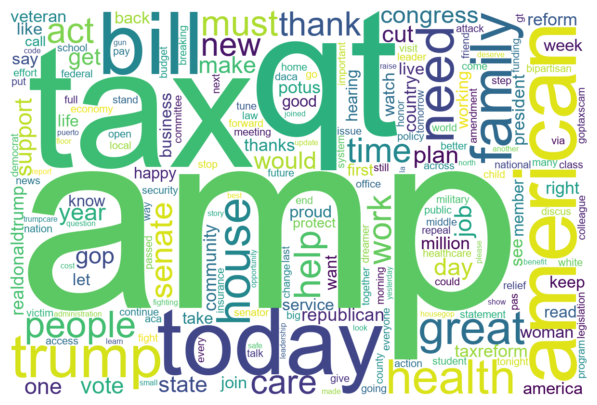

In [26]:
# ËØç‰∫ëÂõæ
wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_freq)

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('wordcloud_twi.png', dpi=100)

### ‰∏≠ÊñáÔºàÂæÆÂçöÔºâ

In [46]:
# ÂØºÂÖ•Êï∞ÊçÆ
text_weibo = pd.read_csv(r'D:\Á†î‰∏Ä‰∏ã ‰Ωú‰∏ö\ÊñáÊú¨ÂàÜÊûê\ËØçË¢ãÊ®°Âûã\text_analysis_weibo.csv')
text_weibo = text_weibo.drop(['Unnamed: 0'],axis = 1)
text_weibo.head()

Ê†áÈ¢ò/ÂæÆÂçöÂÜÖÂÆπ  ÁÇπËµû  ËΩ¨Âèë  ËØÑËÆ∫  \
0             #È´òÊ†°ÈÄöÊä•ÊïôÂ∏àÂõæ‰π¶È¶ÜÊâìÁîµËØùÂ£∞Èü≥ËøáÂ§ßÂá∫Ë®Ä‰∏çÈÄä#ÂÖ¨ÈÅìËá™Âú®‰∫∫ÂøÉÔºåË∞£Ë®ÄËá™Âú®‰∫∫ÂøÉ ‚Äã‚Äã   0   0   0   
1                                                ËΩ¨ÂèëC   0   0   0   
2  „Äê#ÂàòÈõ®ÊòïËøêÂä®ËÄÖËÅîÊøõ#Ê≤≥Â±±Ë¶ÜÂÜ∞Èõ™ÔºåÂÅ•ÂÑøËøéÂÜ¨Â••[ÈáëÁâå]ÂÖ®ËÉΩÂî±Ë∑≥‰∏çËÆæÈôêÔºåËøêÂä®ËÅîÊøõÂºÄÊñ∞Âπ¥üá®üá≥ ÊúüÂæÖ...   0   0   0   
3  ‰∏ÅÁ®ãÈë´//@‰∏ÅÁ®ãÈë´ÂêéÊè¥‰ºöÂÆòÂçö:#‰∏ÅÁ®ãÈë´[Ë∂ÖËØù]# ‚ú®#‰∏ÅÁ®ãÈë´ ‰∫åÂçÅÊàêÈáëÁ≠ëÊ¢¶Èë´‰∏ñÁïå# Â§ßÂπ¥Âàù‰∏Ä...   0   0   0   
4                        ËØ∂Ôºå‰Ω†‰ª¨Áúü‰∏çË¶ÅËÑ∏ËØ∂„ÄÇ„ÄÇ„ÄÇÊ≤°ËµÑÊ†ºÂÆ£‰º†Â••Ëøê„ÄÇ„ÄÇ„ÄÇÊäµÂà∂ÊäµÂà∂ÔºÅ   0   0   0   

                          Ë¥¶Âè∑ÊòµÁß∞UIDÂä†ÂØÜ  Á≤â‰∏ùÊï∞   ÂÖ≥Ê≥®Êï∞  Âú∞Âüü  
0  a2331b38901d62d2d9a20529177ef3b3    0    22  ÊπñÂåó  
1  d6dc4470f51fce93cc0cbad8abf55a75    0    33  ÂπøË•ø  
2  372bc4782eb442b88035f920a7c1a68e    6    85  Âπø‰∏ú  
3  6fe0d482bd3e78a3483e2a1d57f14ef2   75  1012  Âπø‰∏ú  
4  872380d71d6ee9130e8b49d331f2baa9    0    10  Âπø‰∏ú

In [48]:
# ÂàÜÊûêËØ≠Êñô
text_w= list(text_weibo['Ê†áÈ¢ò/ÂæÆÂçöÂÜÖÂÆπ'])
text_w[:5]

['#È´òÊ†°ÈÄöÊä•ÊïôÂ∏àÂõæ‰π¶È¶ÜÊâìÁîµËØùÂ£∞Èü≥ËøáÂ§ßÂá∫Ë®Ä‰∏çÈÄä#ÂÖ¨ÈÅìËá™Âú®‰∫∫ÂøÉÔºåË∞£Ë®ÄËá™Âú®‰∫∫ÂøÉ \u200b\u200b',
 'ËΩ¨ÂèëC',
 '„Äê#ÂàòÈõ®ÊòïËøêÂä®ËÄÖËÅîÊøõ#Ê≤≥Â±±Ë¶ÜÂÜ∞Èõ™ÔºåÂÅ•ÂÑøËøéÂÜ¨Â••[ÈáëÁâå]ÂÖ®ËÉΩÂî±Ë∑≥‰∏çËÆæÈôêÔºåËøêÂä®ËÅîÊøõÂºÄÊñ∞Âπ¥üá®üá≥ ÊúüÂæÖÂÖ®ËÉΩÈü≥‰πê‰∫∫@ÂàòÈõ®Êòï ‰∏é#ËøêÂä®ËÄÖËÅîÊøõ#‰∏ÄËµ∑Ôºå‰∏∫ÂÜ¨Â••Ëµõ‰∫ãÂä©ÂäõÂä†Ê≤πÔºÅ„Äë',
 '‰∏ÅÁ®ãÈë´//@‰∏ÅÁ®ãÈë´ÂêéÊè¥‰ºöÂÆòÂçö:#‰∏ÅÁ®ãÈë´[Ë∂ÖËØù]# ‚ú®#‰∏ÅÁ®ãÈë´ ‰∫åÂçÅÊàêÈáëÁ≠ëÊ¢¶Èë´‰∏ñÁïå# Â§ßÂπ¥Âàù‰∏ÄÈîÅÂÆö@Âåó‰∫¨Âç´ËßÜ ÂíåÈó®Èù¢‰∏ªËàû@Êó∂‰ª£Â∞ëÂπ¥Âõ¢-‰∏ÅÁ®ãÈë´ ‰∏ÄËµ∑ËøáÂ§ßÂπ¥ÔºåÊã•Êä±ÂÜ∞Èõ™ÔºåËá¥Êï¨ÂÜ¨Â••ÔºÅ',
 'ËØ∂Ôºå‰Ω†‰ª¨Áúü‰∏çË¶ÅËÑ∏ËØ∂„ÄÇ„ÄÇ„ÄÇÊ≤°ËµÑÊ†ºÂÆ£‰º†Â••Ëøê„ÄÇ„ÄÇ„ÄÇÊäµÂà∂ÊäµÂà∂ÔºÅ']

In [60]:
# ‰∏ãËΩΩ
stopwords = open(r'D:\Á†î‰∏Ä‰∏ã ‰Ωú‰∏ö\ÊñáÊú¨ÂàÜÊûê\ËØçË¢ãÊ®°Âûã\stopwords.txt', encoding = 'utf-8').read()

In [ ]:
# Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
def data_preprocess_chi(text):
    # ÂâîÈô§Á¨¶Âè∑‰∏éÊï∞Â≠ó
    nonums_text = re.sub('[^\u4e00-\u9fa5]+', '', str(text))
        
    # ÂàÜËØç
    words = jieba.cut(nonums_text)
    
    # ÂéªÈô§ÂÅúÁî®ËØç
    words = [w for w in words if w not in list(stopwords) and w!='\u200b' and w!='ËΩ¨Âèë']
    
    return ' '.join(words)

text_weibo['clean_text'] = text_weibo['Ê†áÈ¢ò/ÂæÆÂçöÂÜÖÂÆπ'].apply(data_preprocess_chi)

In [ ]:
# Â±ïÁ§∫È¢ÑÂ§ÑÁêÜÊàêÊûú
text = list(text_weibo['clean_text'])
text

In [ ]:
# ËÆ°ÁÆóËØçÈ¢ë

# ÂàùÂßãÂåñCountVectorizer
vectorizer = CountVectorizer()

# Â∞ÜÊñáÊú¨Êï∞ÊçÆËΩ¨Êç¢‰∏∫ËØçË¢ãÁâπÂæÅÁü©Èòµ
X = vectorizer.fit_transform(text)

# Ëé∑ÂèñËØçÊ±áË°®
feature_words = vectorizer.get_feature_names_out()

# ËÆ°ÁÆóËØçÈ¢ëÁªüËÆ°
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

# ÊéíÂ∫è
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# ÂèØËßÜÂåñËØç‰∫ëÂõæ
wordcloud = WordCloud(
    font_path='simhei.ttf',  
    background_color='white',  
    width=1200,
    height=800,
    max_words=200,  
    max_font_size=100  
).generate_from_frequencies(word_freq)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### ‰ΩøÁî®Ëá™Â∑±Êï∞ÊçÆË∑ë‰∏Ä‰∏ã

In [ ]:
# ÂØºÂÖ•Êï∞ÊçÆ
text_wj = pd.read_csv(r'D:\Á†î‰∏Ä‰∏ã ‰Ωú‰∏ö\ÊñáÊú¨ÂàÜÊûê\ËØçË¢ãÊ®°Âûã\D:\Á†î‰∏Ä‰∏ã ‰Ωú‰∏ö\ÊñáÊú¨ÂàÜÊûê\ËØçË¢ãÊ®°Âûã\CMFA(1).xlsx')
text_wj = text_twi.drop(['Unnamed: 0'], axis=1)

In [ ]:
text_wj.head()

In [ ]:
## Data Cleaning and Text Processing.
def preprocess_text(text):
    # Â∞èÂÜô
    text = text.lower()
    
    # ÂàÜËØç
    tokens = word_tokenize(text)
    
    # ÂéªÈô§ÂÅúÁî®ËØç
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # ÂéªÈô§Ê†áÁÇπÁ¨¶Âè∑ÂíåÊï∞Â≠ó
    filtered_tokens = [word for word in filtered_tokens if word.isalpha()]
    #filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
    
    # ËØçÊÄßÊ†áÊ≥®‰∏éÁ≠õÈÄâ
    pos_tags = pos_tag(filtered_tokens)
    #selected_tokens = [word  for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
    
    # ËØçÊÄßËøòÂéü
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
  
    # ËøîÂõûÈ¢ÑÂ§ÑÁêÜÂêéÁöÑÊñáÊú¨
    return ' '.join(lemmatized_tokens)


# ÂÆö‰πâÂáΩÊï∞Â∞ÜËØçÊÄßÊ†áÁ≠æÊò†Â∞ÑÂà∞ WordNet ËØçÊÄßÊ†áÁ≠æ
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # ÂΩ¢ÂÆπËØç
    elif treebank_tag.startswith('V'):
        return 'v'  # Âä®ËØç
    elif treebank_tag.startswith('N'):
        return 'n'  # ÂêçËØç
    else:
        return None  # ÈªòËÆ§‰∏∫ÂêçËØç

df['answer_processed'] = df['answer'].apply(preprocess_text)

In [ ]:
# Â±ïÁ§∫È¢ÑÂ§ÑÁêÜÁªìÊûú
text_wj_list = list(df['answer_processed'])
text_wj_list[:10]

In [ ]:
# ËÆ°ÁÆóËØçÈ¢ë
# ËÆ°ÁÆóËØçÈ¢ë

# ÂàùÂßãÂåñCountVectorizer
vectorizer = CountVectorizer()

# Â∞ÜÊñáÊú¨Êï∞ÊçÆËΩ¨Êç¢‰∏∫ËØçË¢ãÁâπÂæÅÁü©Èòµ
X = vectorizer.fit_transform(text_wj_list)

# Ëé∑ÂæóËØçÊ±áË°®
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# ÂèØËßÜÂåñ‚ÄîËØç‰∫ëÂõæ
wordcloud = WordCloud(
    font_path='simhei.ttf',  
    background_color='white',  
    width=1200,
    height=800,
    max_words=200,  
    max_font_size=100  
).generate_from_frequencies(word_freq)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()